In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>EDA metadata-sitios</h1>
Nuestro Dataset de Google Maps está dividido en dos directorios: "reviews-estados" (posee datos sobre las reviews de cada estado de Estados Unidos) y "metadata-sitios" (posee datos sobre cada negocio).

<h3>Análisis del directorio "metadata-sitios"</h3>
Este posee la información de diversos negocios, la cual está dividida en distintos archivos JSON.

**Cargamos los arhcivos JSON de la metadata de los negocios y los unificamos, para luego guardarlo como CSV:**

In [ ]:
# Ruta de la carpeta que contiene los archivos JSON:
carpeta = r"..\Datasets\Google Maps\metadata-sitios"

# Obtenemos la lista de archivos en la carpeta:
archivos = os.listdir(carpeta)

# Lista para almacenar los DataFrames de los JSON individuales:
dataframes = []

# Iteramos sobre los archivos:
for archivo in archivos:

    # Verificamos si el archivo es un archivo JSON:
    if archivo.endswith(".json"):

        # Construimos la ruta completa al archivo:
        ruta_completa = os.path.join(carpeta, archivo)
        
        # Cargamos el archivo JSON como DataFrame:
        df = pd.read_json(ruta_completa, lines=True)
        
        # Agregamos el DataFrame a la lista:
        dataframes.append(df)

# Concatenamos todos los DataFrames en uno solo:
df_completo = pd.concat(dataframes, ignore_index=True)

# Guardado como CSV:
df_completo.to_csv("../Datasets/Google Maps/metadata_sitios.csv", index=False)

**Cargamos el CSV creado:**

In [3]:
df_metadata = pd.read_csv(r"../Datasets/Google Maps/metadata_sitios.csv")
df_metadata.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,NaN,32.388300,-83.357100,['Pharmacy'],4.9,16,NaN,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,NaN,34.018891,-118.215290,['Textile exporter'],4.5,6,NaN,NaN,NaN,Open now,"['0x80c2c624136ea88b:0xb0315367ed448771', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,34.058092,-118.292130,['Korean restaurant'],4.4,18,NaN,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,NaN,34.023669,-118.232930,['Fabric store'],3.3,6,NaN,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"['0x80c2c8811477253f:0x23a8a492df1918f7', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,NaN,34.036694,-118.249421,['Fabric store'],4.3,7,NaN,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"['0x80c2c62c496083d1:0xdefa11317fe870a1', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


**Descripción de cada columna:**

In [6]:
df_metadata.dtypes

name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object

Las columnas que presenta nuestro DataFrame son las siguientes:
- name: tipo object, nombre del negocio.
- address: tipo object, dirección del negocio.
- gmap_id: tipo object, ID del negocio.
- description: tipo object, descrición del negocio.
- latitude: tipo float64, latitud del negocio.
- longitude: tipo float64, longitud del negocio.
- category: tipo object, categoría del negocio.
- avg_rating: tipo float64, calificación promedio del negocio del 1(peor) al 5(mejor).
- num_of_reviews: tipo int64, cantidad de reseñas.
- price: tipo object, rango de precios del negocio: $ (barato), $$ (moderado), $$$ (caro), $$$$ (muy caro).
- hours: tipo object, horario de apertura.
- MISC: tipo object, diversa información sobre el negocio (opciones de servicio, salud y seguridad, accesibilidad, planificación, métodos de pago).
- state: tipo object, estatus actual del negocio: abierto, cerrado, permanentemente cerrado, etc.
- relative_results: tipo object, negocios similares recomendados por Google.
- url: tipo object, URL de la ubicación del negocio en Google Maps.

**Revisamos si hay registros en blanco:**

In [8]:
len(df_metadata[df_metadata.isnull().all(axis=1)])

0

No hay registros (filas completas) en blanco.

**Revisamos la existencia de registros duplicados:**

In [10]:
df_metadata.duplicated().sum()

26583

Hay 26583 registros duplicados en el DataFrame.

In [11]:
# Eliminamos los duplicados:
print(f"Cantidad de registros: {len(df_metadata)}")
df_metadata.drop_duplicates(inplace=True)
print(f"Cantidad de registros luego del filtro: {len(df_metadata)}")


Cantidad de registros: 3025011
Cantidad de registros luego del filtro: 2998428


**Chequeamos la cantidad de valores nulos en cada columna:**

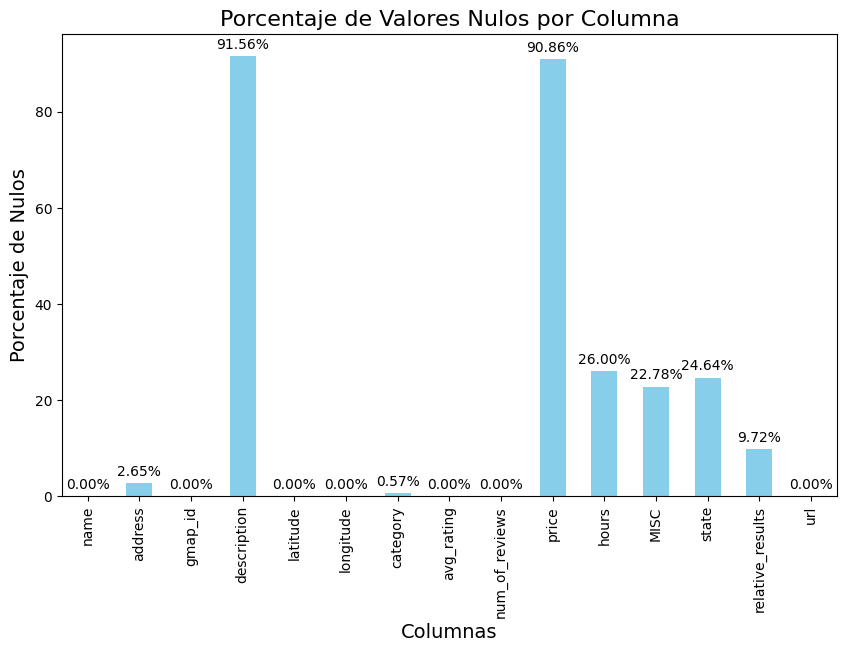

In [12]:
porcentaje_nulos = (df_metadata.isnull().sum() / len(df_metadata)) * 100

plt.figure(figsize=(10, 6))
ax = plt.subplot()
porcentaje_nulos.plot(kind="bar", color="skyblue", ax=ax)

for i, v in enumerate(porcentaje_nulos): # Agrega el porcentaje de nulos en cada columna
    ax.text(i, v + 1, f"{v:.2f}%", ha="center", va="bottom", fontsize=10, color="black")

plt.title("Porcentaje de Valores Nulos por Columna", fontsize=16)
plt.xlabel("Columnas", fontsize=14)
plt.ylabel("Porcentaje de Nulos", fontsize=14)
plt.show()

Las columnas que poseen valores nulos son las siguientes:
- adress: 2.65% de valores nulos.
- description: 91.56% de valores nulos, la mayoría de los negocios no poseen descripción.
- category: 0.57% de valores nulos.
- price: 90.86% de valores nulos, la mayoría de los negocios no poseen un rango de precios definido.
- hours: 26% de valores nulos.
- MISC: 22.78% de valores nulos.
- state: 24.64% de valores nulos.
- relative_results: 9.72% de valores nulos.

Los valores nulos en la columna category representan una pérdida o falta de información ya que la/s categoría/s del negocio es información crucial para su inclusión en el análisis. La falta de datos en las columnas "hours", "MISC" y "state" podrían también representar una falta de información problemática.

**Visualizamos métricas descriptivas de las columnas numéricas:**

In [15]:
df_metadata.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,2.998428e+06,2.998428e+06,2.998428e+06,2.998428e+06
mean,3.742927e+01,-9.234204e+01,4.303666e+00,4.384394e+01
std,5.425494e+00,1.635375e+01,7.119273e-01,1.435629e+02
min,-4.092931e+01,-1.788071e+02,1.000000e+00,1.000000e+00
25%,3.370949e+01,-9.925989e+01,4.000000e+00,7.000000e+00
50%,3.827702e+01,-8.759823e+01,4.500000e+00,1.800000e+01
75%,4.129133e+01,-8.029603e+01,4.800000e+00,4.400000e+01
max,8.785652e+01,1.800000e+02,5.000000e+00,9.998000e+03


- count: número de observaciones no nulas.
- mean: media aritmética de los valores.
- std: desviación estándar.
- min: valor mínimo.
- 25% (percentil 25): valor que separa el 25% más bajo de los datos.
- 50% (percentil 50 o mediana): valor que separa el 50% de los datos, es decir, el valor medio.
- 75% (percentil 75): valor que separa el 75% más bajo de los datos.
- max: valor máximo.

**Mapa de correlaciones de las variables numéricas:**

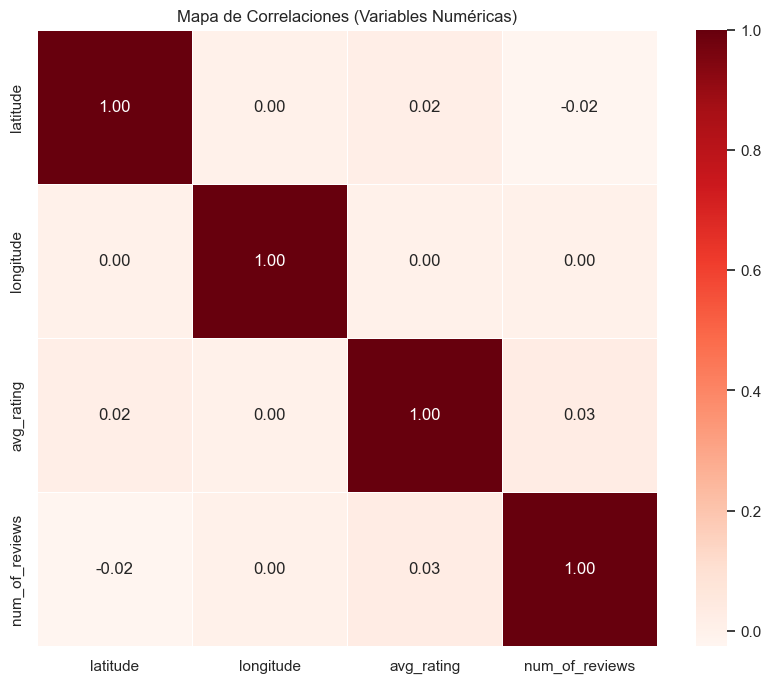

In [17]:
# Seleccionamos solo las columnas numéricas:
df_numericas = df_metadata.select_dtypes(include='number')

# Calculamos la matriz de correlación:
correlaciones = df_numericas.corr()

# Configuramos el mapa de calor con colores rojizos:
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='Reds', fmt='.2f', linewidths=.5)
plt.title('Mapa de Correlaciones (Variables Numéricas)')
plt.show()

No encontramos ninguna fuerte correlación.

**Buscamos valores atípicos (outliers):**

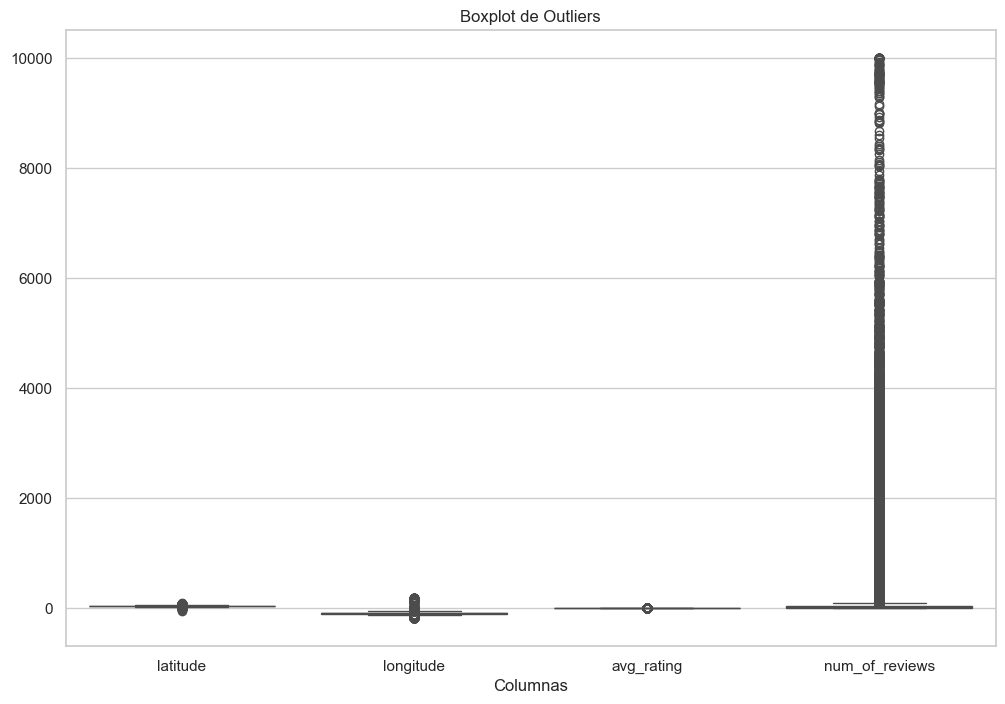

In [19]:
# Creamos un gráfico de boxplot para identificar outliers en todas las columnas:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_metadata)
plt.xlabel('Columnas')
plt.title('Boxplot de Outliers')
plt.show()

No encontramos ningún valor atípico.

**Los negocios con mayor cantidad de reseñas:**

In [32]:
# Filtramos los 10 negocios con mayor cantidad de reseñas:
df_mas_reseñas = df_metadata.sort_values(by="num_of_reviews", ascending=False)[["name", "gmap_id", "num_of_reviews"]].head(10).reset_index(drop=True)
df_mas_reseñas

,name,gmap_id,num_of_reviews
0,Katz's Delicatessen,0x89c2598f7ff4aa09:0x313547e757cb8cea,9998
1,The Old Mill Restaurant,0x885bff0120ec937d:0x14e7858019748c5f,9998
2,M&M'S World,0x89c258560aeef31d:0x42b8e1082d336c3f,9998
3,Forest Park,0x87d8b5469178c4c9:0x9d27c5026db294aa,9998
4,Cafe Du Monde French Market,0x8620a5e09b473e4d:0xd68fe7e8e35b6f7,9998
5,Fenway Park,0x89e379f63f253f6f:0xa2800dcb647a5504,9998
6,Lombard Street,0x808580e66bb70f81:0x10d3ce0ac1ec1299,9998
7,Santa Monica Pier,0x80c2a4d74d5ea79b:0xcd9a111aced18f4d,9998
8,Houston Zoo,0x8640bf8610513213:0x61f408cc441069f8,9998
9,The Art Institute of Chicago,0x880e2ca3e2d94695:0x4829f3cc9ca2d0de,9998


In [30]:
# Revisamos cuántos negocios poseen 9998 reseñas:
len(df_metadata[df_metadata["num_of_reviews"] == 9998])

34

Vemos que son 34 los negocios que poseen más reseñas realizadas, contando con 9998 reseñas cada uno.

**Los negocios con menor cantidad de reseñas:**

In [34]:
# Filtramos los 10 negocios con menor cantidad de reseñas:
df_mas_reseñas = df_metadata.sort_values(by="num_of_reviews", ascending=True)[["name", "gmap_id", "num_of_reviews"]].head(10).reset_index(drop=True)
df_mas_reseñas

,name,gmap_id,num_of_reviews
0,Varano Kenneth J DO,0x89c45ea72348c241:0x1944e9f5eee87ff,1
1,McQuarries Pond,0x882d7ddf450e41d1:0x445015648badcd78,1
2,Woodbridge CAI Estates,0x8640e0b2f67a19f5:0x93243bc931996d06,1
3,Sage Construction,0x88236543c8aa8987:0xd3f9a310bd577e5d,1
4,Nathan D Maier Consulting Engineer,0x864e9f9518307cd3:0x8e32dec0b3190ec6,1
5,Agora Management Inc,0x8640c1ff64c00001:0xad5119f50e61b4a1,1
6,Rooster In A Top Hat,0x880a5837b0729fe3:0x21e617be8eaf1ce9,1
7,SCALE,0x8084bfec2e112393:0x2cb404d3aeaa2dad,1
8,Darlington Creek by Maronda Homes,0x8841988299e70611:0x9916810f6145221b,1
9,New Home Family Worship Center,0x889e017d6157cdd9:0x17c18214d23a24ec,1


In [36]:
# Revisamos cuántos negocios poseen solo una reseña:
len(df_metadata[df_metadata["num_of_reviews"] == 1])

156824

Los negocios que poseen menos reseñas son 156824, cont solo una reseña cada uno.

**Distribución de negocios segun calificación promedio (avg_rating):**

In [53]:
# Creamos una nueva columna "categoria" en base a las calificaciones promedio:
df_metadata['categoria'] = pd.cut(df_metadata['avg_rating'], bins=[-float('inf'), 3, 4, float('inf')], labels=['negativa', 'neutral', 'positiva'], right=False)

# Contamos la cantidad de registros en cada categoría:
df_resultado = pd.DataFrame(df_metadata['categoria'].value_counts()).reset_index()
df_resultado.columns = ['Categoria', 'Recuento']

df_resultado

,Categoria,Recuento
0,positiva,2333526
1,neutral,512649
2,negativa,152253


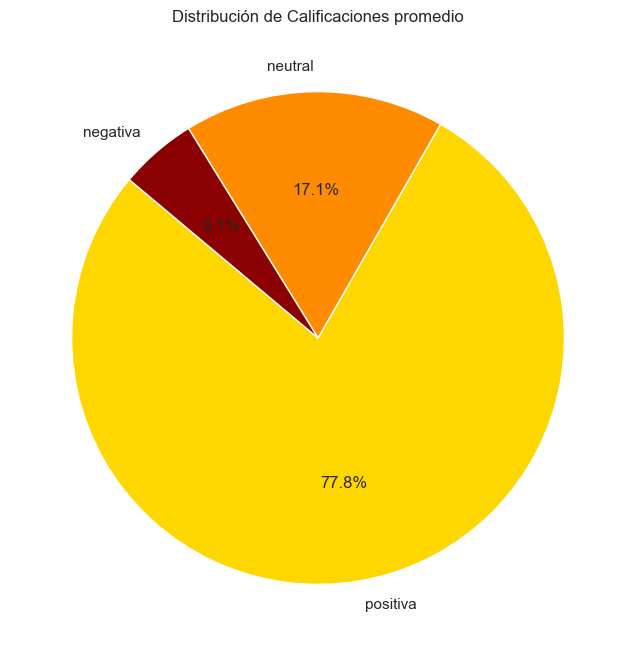

In [58]:
# Creamos un gráfico de torta:
colores = ['gold', 'darkorange', 'darkred']
plt.figure(figsize=(8, 8))
plt.pie(df_resultado['Recuento'], labels=df_resultado['Categoria'], autopct='%1.1f%%', colors=colores, startangle=140)
plt.title('Distribución de Calificaciones Promedio')
plt.show()

Podemos concluir que la mayoría de los negocios poseen una calificación promedio positiva (mayor o igual a 4) contando con el 77.8% de los registros, seguido de los negocios con una calificación promedio neutral (mayor o igual a 3 y menor a 4) con un 17.1%, y por último aquellos que poseen una calificación promedio neutral (menor o igual a 2) con 5.1%.

<h3>Conclusiones:</h3>

El directorio "metadata-sitios" contiene la información sobre los negocios físicos de Estados Unidos. Se da a conocer el nombre del negocio, dirección, horarios de apertura, categroría/s del negocio, opciones de servicio, etcétera. También poseemos diversos datos de geolocalización, ademas de su calificación promedio.

Lo primero que llevamos a cabo fue la fusión de todos estos archivos JSON dentro del directorio, en un nuevo archivo llamado "metadata_sitios.csv" de 3.025.011 registros.

La información se encuentra dividida en 15 columnas de las cuales 4 son de tipo numérico. En este dataset no encontramos registros en blanco, pero si habían presentes 26583 registros duplicados (0.88% de los registros totales) los cuales decidimos eliminar para continuar con un análisis más exacto. Las columnas "description" y "price" tienen más de un 90% de valores nulos, seguido de las columnas "hours", "MISC" y "state" con un cuarto de sus registros como valores nulos. Por último tenemos a "relative_results", "adress" y "category" con una menor cantidad de nulos, siendo "categroy" la que podría representar mayor problema. No se encontraron valores atípicos, ni una alta correlación entre las variables numéricas.